In [ ]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [ ]:
# Revisa la documentacion de python para poder instalar tensorflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# We will use the variables x1=length and x2=width of the sepals as input vector x,
# and use them to predict y1=length and y2=width of the petals (output vector y).
# This is a multivariate-multiple regression scenario.
# We also keep the labels in a vector L, only for visualzation purposes.
iris = load_iris()
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


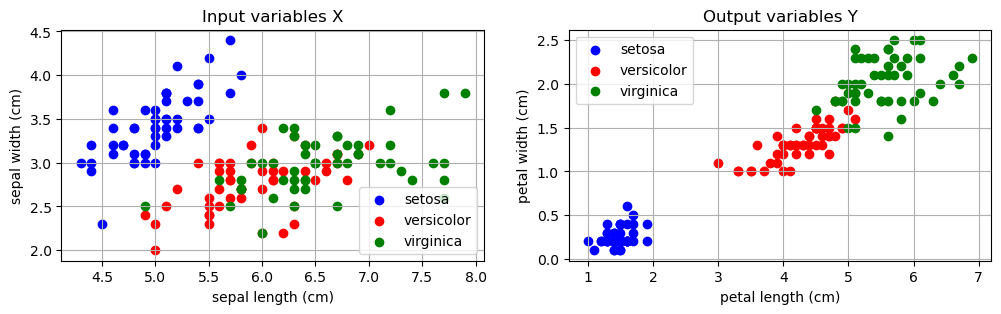

In [3]:
# Plot input and output variables
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.title('Input variables X')
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label=iris.target_names[0])
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label=iris.target_names[1])
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.subplot(1, 2, 2)
plt.title('Output variables Y')
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label=iris.target_names[0])
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label=iris.target_names[1])
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()

In [4]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


In [16]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/

In [6]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

2023-01-16 21:42:43.825776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


2023-01-16 21:43:03.134039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 21:43:03.138727: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
# == Q1 ==
# Revisa la documentación de tensorflow: ¿qué tipo de activación tiene
# la capa de salida de la red que acabamos de crear?

In [ ]:
# == Q2 ==
# Según la documentación de tensorflow (y/o el código de la siguiente celda),
# ¿Qué extructura de datos usa tensorflow para organizar las capas de una red?

In [20]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 0.04777622  0.6302316 ]
 [-0.8388804  -0.07909656]]
Initial biases (2,)
[0. 0.]


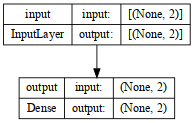

In [8]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [22]:
# Here we define the optimizer and loss function
# sgd and mse in this initial example
MLP.compile(optimizer='sgd', loss='mse')

In [23]:
# And now we train the model
# Learn to predict petal's lenght and width from sepal's lenght and width
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, validation_split=0.2)

Train on 101 samples, validate on 26 samples
Epoch 1/20
101/101 [==============================] - 1s 7ms/sample - loss: 1.8397 - val_loss: 1.3095
Epoch 2/20
101/101 [==============================] - 0s 458us/sample - loss: 0.7729 - val_loss: 0.6610
Epoch 3/20
101/101 [==============================] - 0s 429us/sample - loss: 0.6358 - val_loss: 0.8697
Epoch 4/20
101/101 [==============================] - 0s 423us/sample - loss: 0.5758 - val_loss: 0.9388
Epoch 5/20
101/101 [==============================] - 0s 405us/sample - loss: 0.5665 - val_loss: 0.5535
Epoch 6/20
101/101 [==============================] - 0s 455us/sample - loss: 0.4981 - val_loss: 0.5883
Epoch 7/20
101/101 [==============================] - 0s 436us/sample - loss: 0.4656 - val_loss: 0.6000
Epoch 8/20
101/101 [==============================] - 0s 450us/sample - loss: 0.4528 - val_loss: 0.4260
Epoch 9/20
101/101 [==============================] - 0s 402us/sample - loss: 0.4372 - val_loss: 0.5929
Epoch 10/20
101/101 [

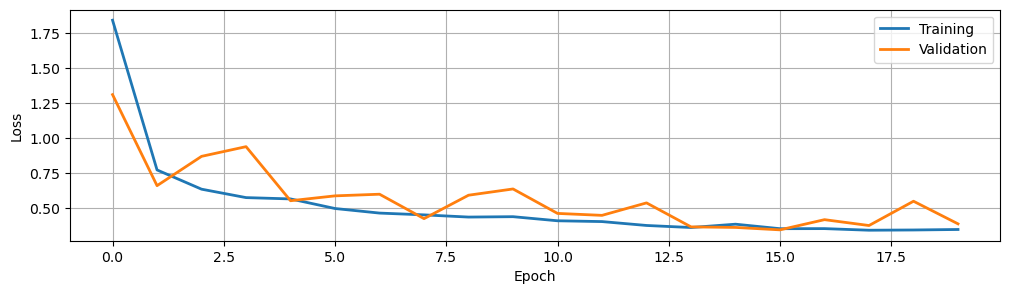

In [25]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [26]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.3960694  0.5279263]
 [-1.5085516 -0.6081454]]
Initial biases (2,)
[-0.13209102 -0.17711693]


In [27]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.5874341726303101

In [28]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(23, 2)


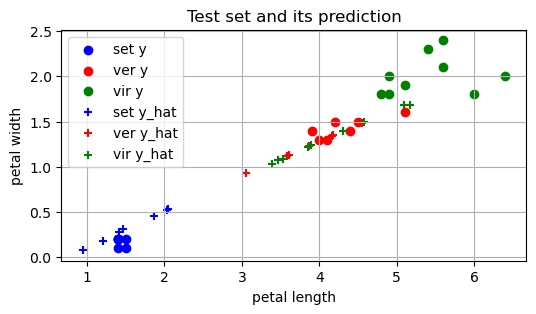

In [30]:
 # Plot y_test_hat
plt.figure(figsize=(6, 3))
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_hat')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_hat')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_hat')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Test set and its prediction')
plt.show()

In [ ]:
# == Q3 ==
# En el ejercicio anterior le indicamos a tensorflow que separara 20% de los
# datos de entrenamiento para hacer validación. Dicho 20% es seleccionado de
# manera aleatoria. Revisa la documentación de la función .fit() para saber
# cómo puedes darle un subset de validación que no cambie entre diferentes
# corridas de entrenamiento. Reporta tu respuesta.

In [40]:
# Create a larger MLP
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='relu', name='hidden1')(i)
h = Dense(units=64, activation='relu', name='hidden2')(h)
h = Dense(units=32, activation='relu', name='hidden3')(h)
o = Dense(units=2, activation='linear', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                96        
_________________________________________________________________
hidden2 (Dense)              (None, 64)                2112      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 2)                 66        
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [42]:
# Train it
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, verbose=2, validation_split=0.2)

Train on 101 samples, validate on 26 samples
Epoch 1/20
101/101 - 1s - loss: 2.2099 - val_loss: 4.7424
Epoch 2/20
101/101 - 0s - loss: 1.2768 - val_loss: 3.2733
Epoch 3/20
101/101 - 0s - loss: 1.0761 - val_loss: 1.3090
Epoch 4/20
101/101 - 0s - loss: 0.7530 - val_loss: 1.5651
Epoch 5/20
101/101 - 0s - loss: 1.0334 - val_loss: 2.3537
Epoch 6/20
101/101 - 0s - loss: 0.6199 - val_loss: 4.4159
Epoch 7/20
101/101 - 0s - loss: 0.8961 - val_loss: 2.2501
Epoch 8/20
101/101 - 0s - loss: 0.4812 - val_loss: 0.3662
Epoch 9/20
101/101 - 0s - loss: 0.3935 - val_loss: 0.3665
Epoch 10/20
101/101 - 0s - loss: 0.2791 - val_loss: 0.3514
Epoch 11/20
101/101 - 0s - loss: 0.4728 - val_loss: 0.6306
Epoch 12/20
101/101 - 0s - loss: 0.4827 - val_loss: 0.2913
Epoch 13/20
101/101 - 0s - loss: 0.4284 - val_loss: 0.9296
Epoch 14/20
101/101 - 0s - loss: 0.6251 - val_loss: 0.5026
Epoch 15/20
101/101 - 0s - loss: 0.3257 - val_loss: 0.2582
Epoch 16/20
101/101 - 0s - loss: 0.3605 - val_loss: 0.7448
Epoch 17/20
101/101 

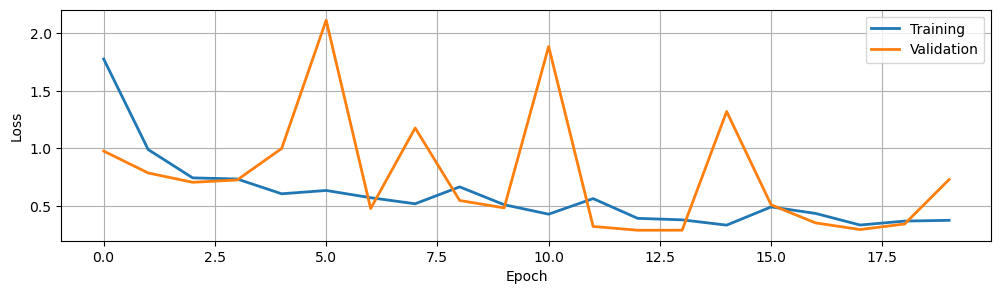

In [34]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# == Q4 ==
# Nota que esta segunda red, aunque más grande, parece generar peores resultados
# en comparación con la primera red. Encuentra la mejor combinación de hiperparámetros
# para minimizar el error tanto como sea posible. Reporta: número de capas, número de
# perceptrones en cada capa, número total de pesos, tamaño del lote, y número de épocas.

In [35]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t') #print(w)
  print("Biases:  ", b.shape) #print(b)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


In [36]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.4967522919178009

In [37]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(23, 2)


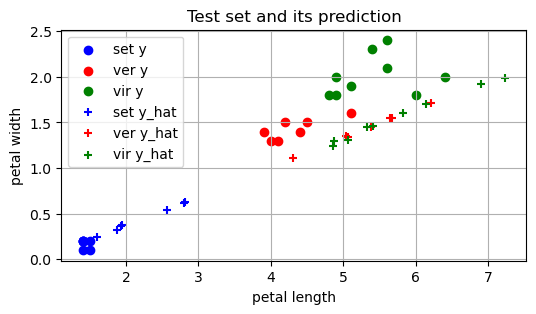

In [39]:
 # Plot y_test_hat
plt.figure(figsize=(6, 3))
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_hat')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_hat')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_hat')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Test set and its prediction')
plt.show()

In [43]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], hid_activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=hid_activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 778
Trainable params: 778
Non-trainable params: 0
_________________________________________________________________


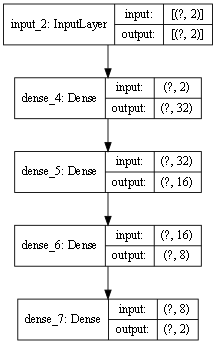

In [46]:
# Example using the function create_MLP()
MLP = create_MLP([2, 32, 16, 8, 2], hid_activations='sigmoid', last_activation='relu')
MLP.summary()

plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((10, 2))
for ind in range(10):
  MLP = create_MLP([2, 32, 16, 8, 2], activations='sigmoid', last_activation='relu')
  MLP.compile(optimizer='sgd', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=0, validation_split=0.2)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

Run   1 -- Train loss: 0.1389; Test loss: 0.1718
Run   2 -- Train loss: 1.0654; Test loss: 1.2951
Run   3 -- Train loss: 1.1532; Test loss: 1.3023
Run   4 -- Train loss: 1.0946; Test loss: 1.3636
Run   5 -- Train loss: 9.3527; Test loss: 10.6733
Run   6 -- Train loss: 0.1326; Test loss: 0.2068
Run   7 -- Train loss: 0.1269; Test loss: 0.1676
Run   8 -- Train loss: 1.0719; Test loss: 1.2687
Run   9 -- Train loss: 0.1379; Test loss: 0.1808
Run  10 -- Train loss: 8.4103; Test loss: 9.6046
Average --  train loss: 2.2684 +- 3.3411;  test loss: 2.6235 +- 3.7989


In [ ]:
# == Q5 ==
# De acuerdo con los resultados obtenidos después de correr el modelo 100 veces,
# ¿pareciera que el modelo es confiables/estable? ¿por qué si o por qué no?

# Challenge. Now try the other way around.

In [10]:
# Use x1=length and x2=width of the petals as input vector x,
# and predict y1=length and y2=width of the sepals (output vector y).
# Find a good model for this prediction problem.